### 딥-러닝 과정 MLP 

## Keras 모델 생성/학습 - 보스턴 집값 예측 모델

### 변수 설명  
* CRIM(1인당 범죄율): per capita crime rate by town  
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS(비소매상업지역의 점유비율_: proportion of non-retail business acres per town.
* CHAS(강 더미): Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX(이산화질소): nitric oxides concentration (parts per 10 million)
* RM(평균 방개수): average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS(도심접근성지수): weighted distances to five Boston employment centres
* RAD(도로접근성지수): index of accessibility to radial highways
* TAX(재산세율): full-value property-tax rate per \$10,000
* PTRATIO (학생/교사비율): pupil-teacher ratio by town
* B 흑인인구 비율: 1000(Bk — 0.63)² where Bk is the proportion of blacks by tow
* LSTAT 하위계층 비율: % lower status of the population
* MEDV 본인소유 주택 가격(중앙값): Median value of owner-occupied homes in $1000’s

In [1]:
# 1. 데이터 불러오기
import pandas as pd
import numpy as np

data = pd.read_csv('BostonHousingData.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
data.describe(include = 'all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

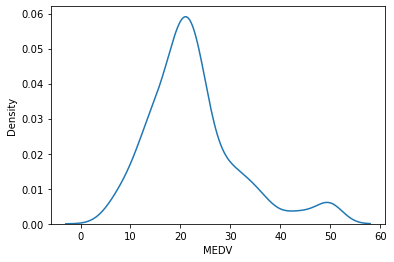

In [3]:
# 데이터 탐색 
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data['MEDV'])

<AxesSubplot:>

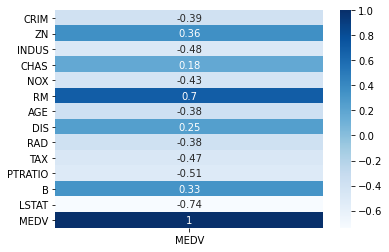

In [4]:
# 데이터 상관관계
sns.heatmap(data.corr()[['MEDV']],annot = True, cmap = 'Blues')

<AxesSubplot:>

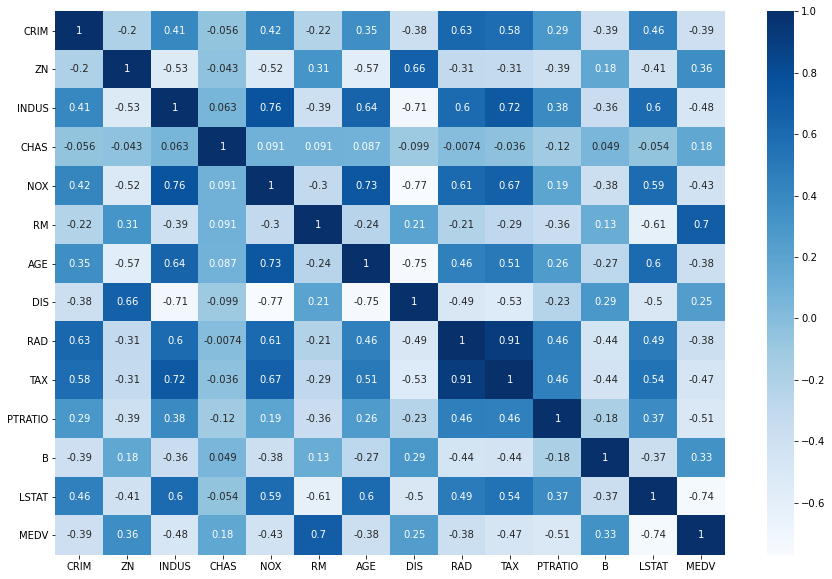

In [5]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot = True, cmap = 'Blues')

RAD와 TAX는 0.91로 높은 상관관계를 보이므로 삭제한다  
'TAX'와 'DIS'가 다른 변수와 높은 상관관계가 있어서 다중공선성 무제 깄을 것 같아서 삭제함

In [6]:
data.drop(['DIS','TAX'], axis = 1, inplace = True)

<AxesSubplot:ylabel='Density'>

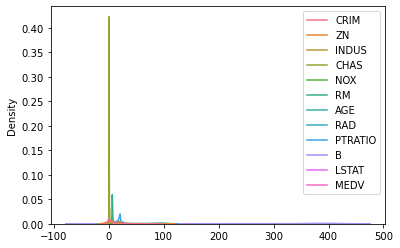

In [7]:
sns.kdeplot(data= data)

데이터의 normalization이 필요해보인다

In [8]:
#  X/y 분리(feature selection)
X = data.copy().drop(['MEDV'], axis = True )
y = data.copy()['MEDV']

In [9]:
# Test/Train spilt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
# validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.5, random_state = 100)

print('X:', X_train.shape, X_val.shape, X_test.shape)
print('y:', y_train.shape, y_val.shape, y_test.shape)

X: (202, 11) (202, 11) (102, 11)
y: (202,) (202,) (102,)


In [10]:
# Data 정규화
from sklearn.preprocessing import StandardScaler

# 정규화 기준은 train_Set으로
scaler = StandardScaler()
scaler.fit(X_train)


X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## 딥러닝 모델링

In [21]:
# 패키지 불러오기
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
model = keras.Sequential()

model.add(Dense(input_dim = X_train.shape[1], units = 128, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(218, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [13]:
# Compile - Optimizer, Loss function 설정
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
               metrics = ['mae'])

In [14]:
# 학습시키기
batch_size = 32
epochs = 200


hist = model.fit(X_train, y_train,
                 validation_data = (X_val, y_val), # Validation_split = 0.1
                 batch_size = batch_size,
                 epochs = epochs,
                 verbose = 1)

Epoch 1/200
7/7 [==============================] - 1s 80ms/step - loss: 624.5335 - mae: 22.7460 - val_loss: 221.9584 - val_mae: 12.7465
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 208.5546 - mae: 11.7427 - val_loss: 126.0285 - val_mae: 8.4692
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 116.7000 - mae: 8.2357 - val_loss: 54.1044 - val_mae: 6.0037
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 60.3397 - mae: 5.7298 - val_loss: 31.4250 - val_mae: 4.3471
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 39.4297 - mae: 4.7460 - val_loss: 22.8070 - val_mae: 3.5464
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 32.4059 - mae: 4.1191 - val_loss: 24.1776 - val_mae: 3.8105
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 35.0765 - mae: 4.5294 - val_loss: 28.1729 - val_mae: 4.3246
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - lo

Epoch 63/200
7/7 [==============================] - 0s 9ms/step - loss: 5.1296 - mae: 1.6991 - val_loss: 13.8451 - val_mae: 2.6960
Epoch 64/200
7/7 [==============================] - 0s 10ms/step - loss: 4.8597 - mae: 1.6385 - val_loss: 12.7929 - val_mae: 2.6194
Epoch 65/200
7/7 [==============================] - 0s 10ms/step - loss: 4.3478 - mae: 1.6051 - val_loss: 12.1129 - val_mae: 2.5892
Epoch 66/200
7/7 [==============================] - 0s 11ms/step - loss: 4.9872 - mae: 1.7258 - val_loss: 13.2203 - val_mae: 2.6924
Epoch 67/200
7/7 [==============================] - 0s 10ms/step - loss: 4.4276 - mae: 1.5673 - val_loss: 13.2798 - val_mae: 2.6797
Epoch 68/200
7/7 [==============================] - 0s 10ms/step - loss: 3.8647 - mae: 1.5114 - val_loss: 12.2054 - val_mae: 2.5399
Epoch 69/200
7/7 [==============================] - ETA: 0s - loss: 3.3444 - mae: 1.488 - 0s 11ms/step - loss: 3.6523 - mae: 1.4678 - val_loss: 12.2680 - val_mae: 2.5785
Epoch 70/200
7/7 [=====================

Epoch 125/200
7/7 [==============================] - 0s 11ms/step - loss: 3.1497 - mae: 1.3732 - val_loss: 12.7083 - val_mae: 2.5918
Epoch 126/200
7/7 [==============================] - 0s 10ms/step - loss: 3.3812 - mae: 1.3304 - val_loss: 12.2371 - val_mae: 2.5924
Epoch 127/200
7/7 [==============================] - 0s 10ms/step - loss: 4.0255 - mae: 1.4977 - val_loss: 12.6577 - val_mae: 2.5710
Epoch 128/200
7/7 [==============================] - 0s 10ms/step - loss: 3.5972 - mae: 1.4121 - val_loss: 14.4247 - val_mae: 2.7486
Epoch 129/200
7/7 [==============================] - 0s 10ms/step - loss: 4.3546 - mae: 1.5737 - val_loss: 12.9185 - val_mae: 2.6071
Epoch 130/200
7/7 [==============================] - 0s 9ms/step - loss: 2.8218 - mae: 1.3128 - val_loss: 13.6989 - val_mae: 2.8212
Epoch 131/200
7/7 [==============================] - 0s 10ms/step - loss: 4.2421 - mae: 1.5967 - val_loss: 13.3524 - val_mae: 2.7698
Epoch 132/200
7/7 [==============================] - 0s 10ms/step - lo

Epoch 187/200
7/7 [==============================] - 0s 10ms/step - loss: 3.2834 - mae: 1.4167 - val_loss: 13.9978 - val_mae: 2.8914
Epoch 188/200
7/7 [==============================] - 0s 9ms/step - loss: 2.9421 - mae: 1.2941 - val_loss: 12.0628 - val_mae: 2.5828
Epoch 189/200
7/7 [==============================] - 0s 10ms/step - loss: 2.1572 - mae: 1.0988 - val_loss: 12.7070 - val_mae: 2.6220
Epoch 190/200
7/7 [==============================] - 0s 10ms/step - loss: 2.4954 - mae: 1.1423 - val_loss: 12.7247 - val_mae: 2.5874
Epoch 191/200
7/7 [==============================] - 0s 10ms/step - loss: 3.1095 - mae: 1.3461 - val_loss: 12.0933 - val_mae: 2.6327
Epoch 192/200
7/7 [==============================] - 0s 10ms/step - loss: 2.8376 - mae: 1.2356 - val_loss: 12.1193 - val_mae: 2.6018
Epoch 193/200
7/7 [==============================] - 0s 10ms/step - loss: 3.3812 - mae: 1.3777 - val_loss: 11.9433 - val_mae: 2.5716
Epoch 194/200
7/7 [==============================] - 0s 10ms/step - lo

In [15]:
#  Model Evaluate
from sklearn.metrics import r2_score, mean_squared_error
model.evaluate(X_test, y_test)

r_2 = r2_score(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))

print('mse:', mse)
print('R_2:', r_2)

4/4 [==============================] - 0s 2ms/step - loss: 11.8315 - mae: 2.3382
mse: 11.831547692890364
R_2: 0.8775130208482768


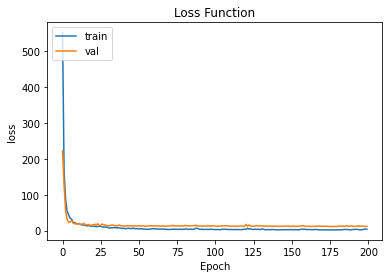

In [16]:
#  학습 시각화하기
# loss 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.title('Loss Function')
plt.show()


overfitting 없지만 dropout 규제를 주고 비교해보자~!


## Droup out

In [25]:
# Drop out
# 모델  초기화 및 생성
model = keras.Sequential()

model.add(Dense(input_dim = X_train.shape[1], units = 128, activation = 'relu'))

model.add(Dropout(0.1)) # 규제 크기 조정

model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

# Compile - Optimizer, Loss function 설정
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
               metrics = ['mae'])

# 학습시키기
batch_size = 32
epochs = 5000

# early stopping
early_stopping = EarlyStopping(monitor = 'val_loss',   patience = 15) 
# 베스트 모델 저장(.h5파일)
model_path = 'keras_house_model.h5'
model_checkpoint = ModelCheckpoint(filepath = model_path,
                                  monitor = 'val_loss',
                                  save_best_only = True)

# fitting
hist = model.fit(X_train, y_train,
                 validation_data = (X_val, y_val),
                 batch_size = batch_size,
                 epochs = epochs,
                 verbose = 1,
                callbacks = [early_stopping, model_checkpoint])

Epoch 1/5000
7/7 [==============================] - 1s 26ms/step - loss: 664.9026 - mae: 23.7917 - val_loss: 503.0473 - val_mae: 20.8766
Epoch 2/5000
7/7 [==============================] - 0s 6ms/step - loss: 655.5755 - mae: 23.4931 - val_loss: 473.4702 - val_mae: 20.1487
Epoch 3/5000
7/7 [==============================] - 0s 6ms/step - loss: 572.3321 - mae: 21.8075 - val_loss: 437.4540 - val_mae: 19.2347
Epoch 4/5000
7/7 [==============================] - 0s 7ms/step - loss: 512.9897 - mae: 20.4597 - val_loss: 393.3355 - val_mae: 18.0680
Epoch 5/5000
7/7 [==============================] - 0s 6ms/step - loss: 483.2136 - mae: 19.8474 - val_loss: 340.6181 - val_mae: 16.6172
Epoch 6/5000
7/7 [==============================] - 0s 7ms/step - loss: 404.2695 - mae: 17.8398 - val_loss: 280.5426 - val_mae: 14.8539
Epoch 7/5000
7/7 [==============================] - 0s 6ms/step - loss: 340.7404 - mae: 16.1991 - val_loss: 215.4178 - val_mae: 12.7349
Epoch 8/5000
7/7 [=============================

7/7 [==============================] - 0s 7ms/step - loss: 14.0078 - mae: 2.6833 - val_loss: 15.6848 - val_mae: 3.0180
Epoch 63/5000
7/7 [==============================] - 0s 6ms/step - loss: 19.1349 - mae: 2.9320 - val_loss: 16.0836 - val_mae: 3.0767
Epoch 64/5000
7/7 [==============================] - 0s 6ms/step - loss: 15.4967 - mae: 2.7277 - val_loss: 16.3237 - val_mae: 3.1073
Epoch 65/5000
7/7 [==============================] - 0s 7ms/step - loss: 18.0400 - mae: 2.8822 - val_loss: 16.4114 - val_mae: 3.1251
Epoch 66/5000
7/7 [==============================] - 0s 6ms/step - loss: 13.4314 - mae: 2.5985 - val_loss: 15.8287 - val_mae: 3.0477
Epoch 67/5000
7/7 [==============================] - 0s 6ms/step - loss: 19.3389 - mae: 2.9291 - val_loss: 15.8286 - val_mae: 3.0428
Epoch 68/5000
7/7 [==============================] - 0s 6ms/step - loss: 18.8797 - mae: 2.8721 - val_loss: 15.7006 - val_mae: 3.0262
Epoch 69/5000
7/7 [==============================] - 0s 6ms/step - loss: 12.6723 - 

7/7 [==============================] - 0s 6ms/step - loss: 14.5025 - mae: 2.7019 - val_loss: 14.2403 - val_mae: 2.8658
Epoch 124/5000
7/7 [==============================] - 0s 6ms/step - loss: 11.0812 - mae: 2.3478 - val_loss: 14.6660 - val_mae: 2.9057
Epoch 125/5000
7/7 [==============================] - 0s 6ms/step - loss: 9.8124 - mae: 2.3306 - val_loss: 14.5525 - val_mae: 2.8930
Epoch 126/5000
7/7 [==============================] - 0s 6ms/step - loss: 12.5022 - mae: 2.3997 - val_loss: 14.5869 - val_mae: 2.8977
Epoch 127/5000
7/7 [==============================] - 0s 6ms/step - loss: 12.4137 - mae: 2.3521 - val_loss: 14.5057 - val_mae: 2.8994


In [23]:
#  Model Evaluate
from sklearn.metrics import r2_score, mean_squared_error
model.evaluate(X_test, y_test)

r_2 = r2_score(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))

print('mse:', mse)
print('R_2:', r_2)

4/4 [==============================] - 0s 1ms/step - loss: 12.2876 - mae: 2.6294
mse: 12.287584791699013
R_2: 0.8727918627999722


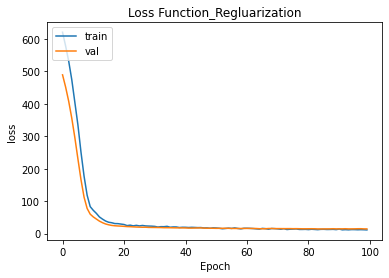

In [24]:
#  학습 시각화하기
# loss 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.title('Loss Function_Regluarization')
plt.show()

규제 후에 val_loss가 더욱 감소한 것을 확인할 수 있다.

## 전통적인 머신러닝 기법

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
        
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

print("linear regression mae = ", mean_absolute_error(pred, y_test))
print("linear regression mse = ", mean_squared_error(pred, y_test))
print("R2 = ", r2_score(y_test, pred))

linear regression mae =  3.602584824594643
linear regression mse =  26.46318383139755
R2 =  0.7260379174068341


In [43]:
from sklearn.tree import DecisionTreeRegressor

DecisiondTree = DecisionTreeRegressor(max_depth=5)

DecisiondTree.fit(X_train, y_train)

pred = DecisiondTree.predict(X_test)

print("DecisionTree mae = ", mean_absolute_error(pred, y_test))
print("DecisionTree mse = ", mean_squared_error(pred, y_test))
print("R2 = ", r2_score(y_test, pred))

DecisionTree mae =  3.4826533521436227
DecisionTree mse =  27.32734854643425
R2 =  0.7170915877987507


mae = 3, R2 = 0.7정도로 보인다  
머신러닝보다 딥러닝이 좋은 성능을 보이고 있는 것을 알 수 있다